In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

X_train = np.load('/content/drive/MyDrive/X_traindl_with_masks65.npy')
y_train = np.load('/content/drive/MyDrive/y_traindl_with_masks65.npy')
X_val   = np.load('/content/drive/MyDrive/X_valdl_with_masks65.npy')
y_val   = np.load('/content/drive/MyDrive/y_valdl_with_masks65.npy')
X_test  = np.load('/content/drive/MyDrive/X_testdl_with_masks65.npy')
y_test  = np.load('/content/drive/MyDrive/y_testdl_with_masks65.npy')

# Convert grayscale to 3-channel RGB
X_train = np.repeat(X_train, 3, axis=-1)
X_val   = np.repeat(X_val, 3, axis=-1)
X_test  = np.repeat(X_test, 3, axis=-1)

# Apply VGG16 preprocessing
X_train = preprocess_input(X_train)
X_val   = preprocess_input(X_val)
X_test  = preprocess_input(X_test)

print(f"Updated shape after channel expansion: {X_train.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated shape after channel expansion: (21852, 64, 64, 3)


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Input shape (assuming you've resized to 299x299x3)
inputs = Input(shape=(64, 64, 3))

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
base_model.trainable = False

# Build on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(4, activation='softmax')(x)  # 4 output classes

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' if labels are not one-hot
    metrics=['accuracy']
)

model.summary()

# --- Callbacks ---
early_stop = EarlyStopping(patience=5, restore_best_weights=True)




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,766,852 (60.15 MB)

 Trainable params: 1,052,164 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# --- Callbacks ---
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# --- Train model (initial training with frozen VGG16) ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.3171 - loss: 1.7756 - val_accuracy: 0.3742 - val_loss: 1.2766
Epoch 2/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.3530 - loss: 1.2959 - val_accuracy: 0.3742 - val_loss: 1.2956
Epoch 3/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.3584 - loss: 1.2876 - val_accuracy: 0.3742 - val_loss: 1.2769
Epoch 4/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3612 - loss: 1.2823 - val_accuracy: 0.3742 - val_loss: 1.2752
Epoch 5/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.3786 - loss: 1.2757 - val_accuracy: 0.3742 - val_loss: 1.2734
Epoch 6/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.3676 - loss: 1.2762 - val_accuracy: 0.3742 - val_loss: 1.2743
Epoch 7/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3742 - loss: 1.2703 - val_accuracy: 0.3742 - val_loss: 1.2714
Epoch 8/25
683/683 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3698 - loss: 1.2778 - 

In [ ]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6957 - loss: 0.8514

Test Accuracy: 0.5907


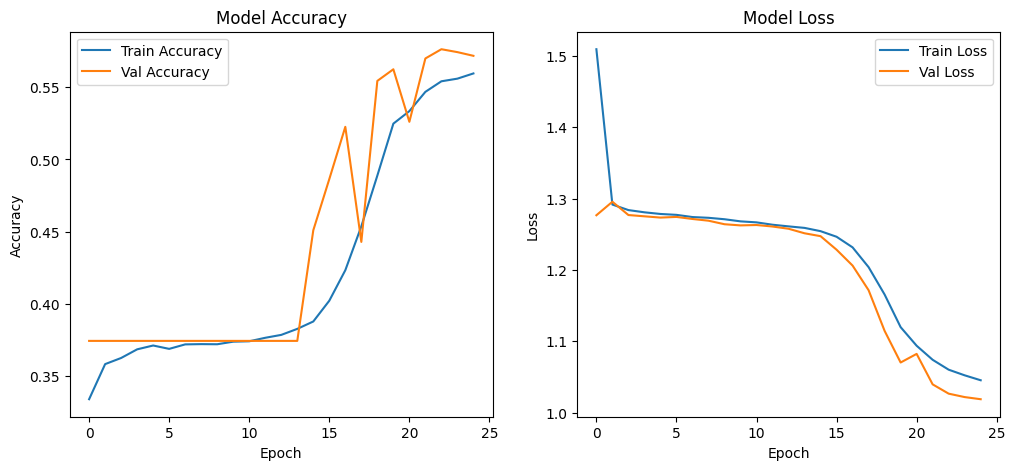

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
import cv2
from tqdm import tqdm

def resize_images(images, size=(224, 224)):
    resized = np.zeros((len(images), size[0], size[1], 3), dtype=np.uint8)
    for i in tqdm(range(len(images))):
        img = images[i]
        img_resized = cv2.resize(img, size)
        if img_resized.ndim == 2:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)
        resized[i] = img_resized
    return resized

# Resize your datasets
X_train = resize_images(X_train)
X_val   = resize_images(X_val)
X_test  = resize_images(X_test)


100%|██████████| 3176/3176 [00:00<00:00, 9192.36it/s]


In [ ]:
# Define preprocessing function to be applied *within* the tf.data pipeline
def preprocess_image(index):
    # Load the data point using the index.
    # Use tf.py_function to wrap non-TensorFlow operations (like NumPy array indexing).
    # The output shapes and types are explicitly defined.
    image = tf.py_function(lambda idx: X_train[idx.numpy()], [index], Tout=tf.uint8)
    label = tf.py_function(lambda idx: y_train[idx.numpy()], [index], Tout=tf.float32)

    # Reshape the outputs of py_function to match the expected shapes
    image.set_shape(X_train.shape[1:])
    label.set_shape(y_train.shape[1:])


    # Convert image to float32
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # Apply VGG16 preprocessing
    # VGG16 expects input in [0, 255] range, so scale the image back
    image = tf.keras.applications.vgg16.preprocess_input(image * 255.0)
    return image, label

# Define preprocessing function for validation and test datasets
def preprocess_image_val(index):
    image = tf.py_function(lambda idx: X_val[idx.numpy()], [index], Tout=tf.uint8)
    label = tf.py_function(lambda idx: y_val[idx.numpy()], [index], Tout=tf.float32)

    image.set_shape(X_val.shape[1:])
    label.set_shape(y_val.shape[1:])

    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.keras.applications.vgg16.preprocess_input(image * 255.0)
    return image, label

def preprocess_image_test(index):
    image = tf.py_function(lambda idx: X_test[idx.numpy()], [index], Tout=tf.uint8)
    label = tf.py_function(lambda idx: y_test[idx.numpy()], [index], Tout=tf.float32)

    image.set_shape(X_test.shape[1:])
    label.set_shape(y_test.shape[1:])

    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.keras.applications.vgg16.preprocess_input(image * 255.0)
    return image, label


# Create tf.data.Dataset objects from indices
batch_size = 4 # Use a small batch size initially

train_dataset = tf.data.Dataset.from_tensor_slices(np.arange(len(X_train))) # Create dataset from indices
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE) # Apply preprocessing using indices
train_dataset = train_dataset.shuffle(buffer_size=1000) # Shuffle the training data
train_dataset = train_dataset.batch(batch_size) # Create batches
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE) # Prefetch data for performance

val_dataset = tf.data.Dataset.from_tensor_slices(np.arange(len(X_val)))
val_dataset = val_dataset.map(preprocess_image_val, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(np.arange(len(X_test)))
test_dataset = test_dataset.map(preprocess_image_test, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)



In [ ]:
# Now you can use these dataset objects directly in model.fit() and model.evaluate()
# The model definition and compilation parts remain the same.

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Input layer (ensure shape matches your resized images)
inputs = Input(shape=(224, 224, 3))

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
base_model.trainable = False  # freeze for now

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(4, activation='softmax')(x) # Assuming 4 output classes

model = Model(inputs, outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# --- Callbacks ---
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# --- Train model using the tf.data.Dataset ---
history = model.fit(
    train_dataset, # Use the training dataset
    validation_data=val_dataset, # Use the validation dataset
    epochs=10,
    # batch_size is now defined in the dataset creation, so remove it here
    callbacks=[early_stop]
)

# --- Evaluate using the tf.data.Dataset ---
test_loss, test_acc = model.evaluate(test_dataset) # Use the test dataset
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plotting remains the same, as 'history' object is compatible
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import numpy as np

# Plot training & validation accuracy values
# plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# Plot training & validation loss values
# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,979,396 (57.14 MB)

 Trainable params: 264,708 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 191s 34ms/step - accuracy: 0.3597 - loss: 1.2960 - val_accuracy: 0.4203 - val_loss: 1.2533
Epoch 2/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 33ms/step - accuracy: 0.3976 - loss: 1.2618 - val_accuracy: 0.3483 - val_loss: 1.2551
Epoch 3/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 33ms/step - accuracy: 0.4080 - loss: 1.2479 - val_accuracy: 0.4258 - val_loss: 1.2314
Epoch 4/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 33ms/step - accuracy: 0.4140 - loss: 1.2391 - val_accuracy: 0.4161 - val_loss: 1.2345
Epoch 5/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 33ms/step - accuracy: 0.4187 - loss: 1.2319 - val_accuracy: 0.4296 - val_loss: 1.2181
Epoch 6/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 34ms/step - accuracy: 0.4234 - loss: 1.2237 - val_accuracy: 0.4887 - val_loss: 1.2167
Epoch 7/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 185s 34ms/step - accuracy: 0.4303 - loss: 1.2194 - val_accuracy: 0.4428 - val_loss: 1.2143
Epoch 8/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 184s 34ms/step - accuracy: 

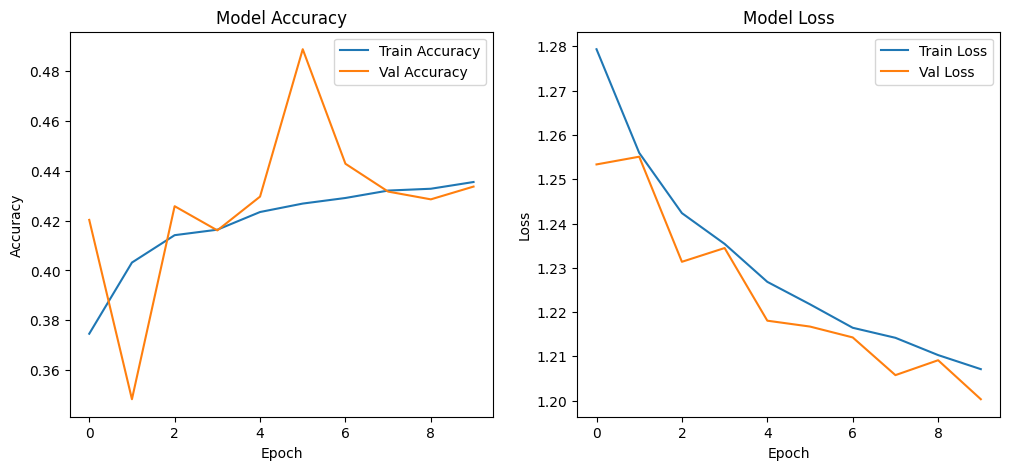

In [ ]:
# Plotting remains the same, as 'history' object is compatible
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
#this plot is worng plot again.

#FINE TUNING VGG 16 LAYERS

In [ ]:
# Unfreeze the last few convolutional layers of VGG16
for layer in base_model.layers[-4:]:
    layer.trainable = True
model.compile(
    optimizer=Adam(1e-5),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#unfreeze last 4 layers

In [ ]:
fine_tune_epochs = 10  # Or however many you need

history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=fine_tune_epochs,
    callbacks=[early_stop]
)


Epoch 1/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 281s 50ms/step - accuracy: 0.4420 - loss: 1.2048 - val_accuracy: 0.5512 - val_loss: 1.1217
Epoch 2/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 275s 50ms/step - accuracy: 0.5029 - loss: 1.1236 - val_accuracy: 0.5365 - val_loss: 1.0915
Epoch 3/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 275s 50ms/step - accuracy: 0.5506 - loss: 1.0639 - val_accuracy: 0.5552 - val_loss: 1.0522
Epoch 4/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 0.5769 - loss: 1.0293 - val_accuracy: 0.5645 - val_loss: 1.0557
Epoch 5/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 0.5877 - loss: 1.0058 - val_accuracy: 0.5889 - val_loss: 1.0084
Epoch 6/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 275s 50ms/step - accuracy: 0.5972 - loss: 0.9864 - val_accuracy: 0.4842 - val_loss: 1.0379
Epoch 7/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 275s 50ms/step - accuracy: 0.6110 - loss: 0.9621 - val_accuracy: 0.5945 - val_loss: 1.0164
Epoch 8/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 

In [ ]:
# --- Evaluate using the tf.data.Dataset ---
test_loss, test_acc = model.evaluate(test_dataset) # Use the test dataset
print(f"\nTest Accuracy: {test_acc:.4f}")
#61% accuracy

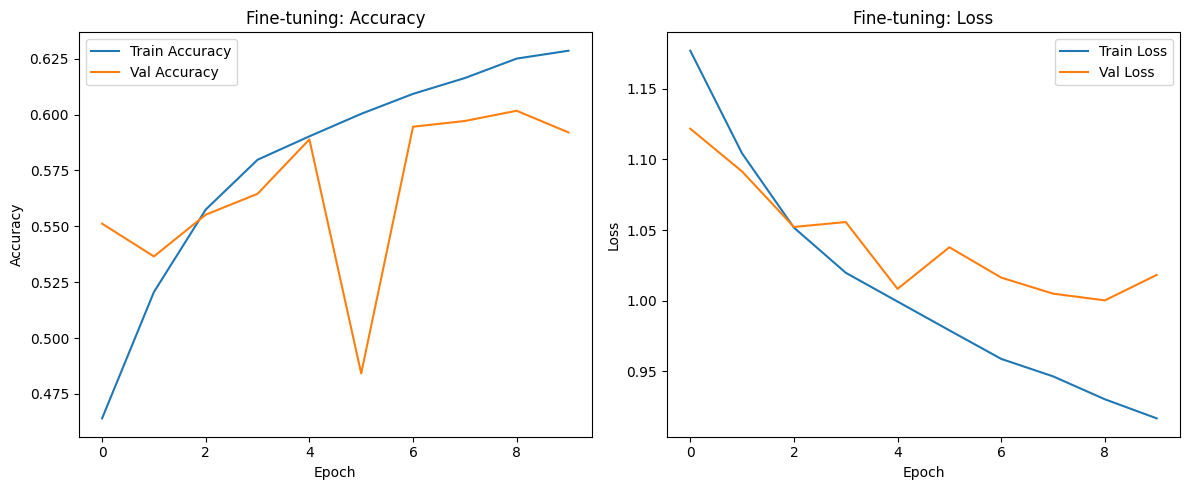

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Fine-tuning: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Fine-tuning: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Unfreeze More Layers Gradually (Block5 )

In [ ]:
# Unfreeze all of block5
for layer in base_model.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model with a low learning rate for fine-tuning
model.compile(
    optimizer=Adam(1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define fine-tuning epochs and early stopping
fine_tune_epochs = 10
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=fine_tune_epochs,
    callbacks=[early_stop]
)
# The model isn't overfitting significantly — training and validation accuracy are tracking each other fairly well.
#Training loss is decreasing steadily.
# Validation loss is fluctuating slightly but not spiking, which is typical for fine-tuning.



Epoch 1/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 280s 50ms/step - accuracy: 0.6252 - loss: 0.9313 - val_accuracy: 0.6021 - val_loss: 1.0210
Epoch 2/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 0.6305 - loss: 0.9194 - val_accuracy: 0.6037 - val_loss: 0.9920
Epoch 3/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 275s 50ms/step - accuracy: 0.6331 - loss: 0.9095 - val_accuracy: 0.6006 - val_loss: 1.0284
Epoch 4/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 0.6370 - loss: 0.9050 - val_accuracy: 0.6074 - val_loss: 1.0090
Epoch 5/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 274s 50ms/step - accuracy: 0.6420 - loss: 0.8939 - val_accuracy: 0.6057 - val_loss: 0.9991


In [ ]:
# --- Evaluate using the tf.data.Dataset ---
test_loss, test_acc = model.evaluate(test_dataset) # Use the test dataset
print(f"\nTest Accuracy: {test_acc:.4f}")

794/794 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.6151 - loss: 0.8339

Test Accuracy: 0.6099


#Unfreeze Block 4 & Block 5 + Fine-Tuning

In [ ]:
from tensorflow.keras.optimizers import Adam

# === 1. UNFREEZE BLOCK 4 & BLOCK 5 LAYERS ===
for layer in base_model.layers:
    if 'block4' in layer.name or 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# === 2. RE-COMPILE THE MODEL WITH A LOWER LEARNING RATE ===
model.compile(
    optimizer=Adam(1e-6),  # Lower learning rate to avoid large weight updates
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




Epoch 1/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 398s 71ms/step - accuracy: 0.6297 - loss: 0.9108 - val_accuracy: 0.5991 - val_loss: 1.0057
Epoch 2/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 390s 71ms/step - accuracy: 0.6376 - loss: 0.8942 - val_accuracy: 0.6123 - val_loss: 0.9956
Epoch 3/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 390s 71ms/step - accuracy: 0.6439 - loss: 0.8845 - val_accuracy: 0.6202 - val_loss: 1.0045
Epoch 4/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 392s 72ms/step - accuracy: 0.6462 - loss: 0.8793 - val_accuracy: 0.6152 - val_loss: 0.9944
Epoch 5/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 392s 72ms/step - accuracy: 0.6493 - loss: 0.8732 - val_accuracy: 0.6174 - val_loss: 0.9954
Epoch 6/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 390s 71ms/step - accuracy: 0.6535 - loss: 0.8649 - val_accuracy: 0.6019 - val_loss: 1.0236
Epoch 7/10
5463/5463 ━━━━━━━━━━━━━━━━━━━━ 392s 72ms/step - accuracy: 0.6529 - loss: 0.8653 - val_accuracy: 0.6081 - val_loss: 1.0195


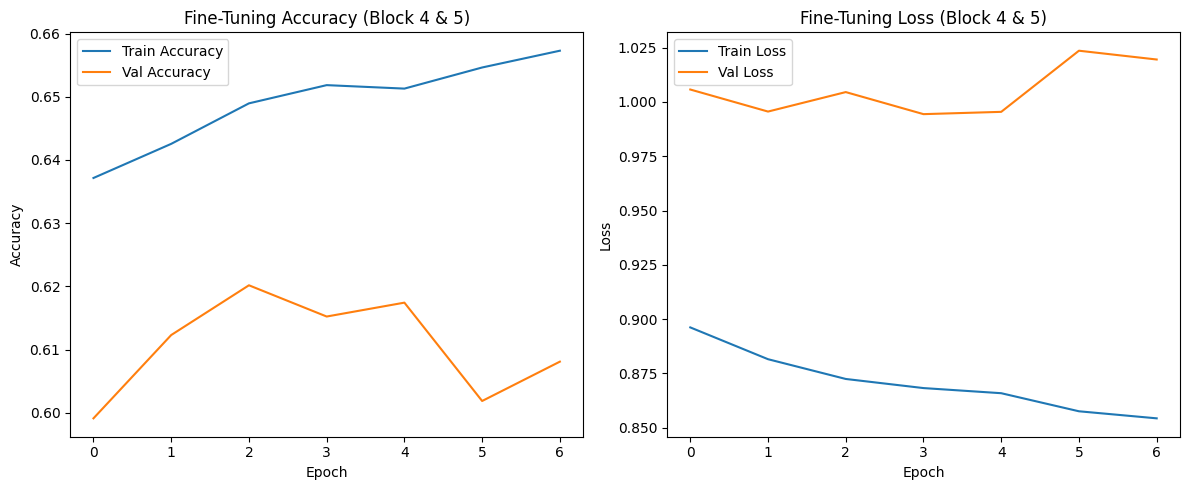

In [ ]:
# === 3. FINE-TUNE ===
fine_tune_epochs = 10  # You can adjust this
history_fine2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=fine_tune_epochs,
    callbacks=[early_stop]
)

# === 4. PLOT TRAINING HISTORY ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_fine2.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine2.history['val_accuracy'], label='Val Accuracy')
plt.title('Fine-Tuning Accuracy (Block 4 & 5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_fine2.history['loss'], label='Train Loss')
plt.plot(history_fine2.history['val_loss'], label='Val Loss')
plt.title('Fine-Tuning Loss (Block 4 & 5)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Final Model (with last 4 layers unfrozen + dropout + relu + l2)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# 1. Define Input
inputs = Input(shape=(224, 224, 3))  # or (64, 64, 1) if you're using grayscale/resized

# 2. Load VGG16 base
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)

# 3. Unfreeze LAST 4 layers only
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

# 4. Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
outputs = Dense(4, activation='softmax')(x)  # 4 output classes

# 5. Compile model
model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Slightly higher LR than fine-tuning all blocks
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 7,211,780 (27.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint, reduce_lr]
)


Epoch 1/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.3289 - loss: 1.7097

683/683 ━━━━━━━━━━━━━━━━━━━━ 182s 245ms/step - accuracy: 0.3289 - loss: 1.7096 - val_accuracy: 0.3742 - val_loss: 1.5502 - learning_rate: 1.0000e-05
Epoch 2/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3549 - loss: 1.5518

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3549 - loss: 1.5518 - val_accuracy: 0.3742 - val_loss: 1.4971 - learning_rate: 1.0000e-05
Epoch 3/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3544 - loss: 1.5033

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3544 - loss: 1.5032 - val_accuracy: 0.3742 - val_loss: 1.4525 - learning_rate: 1.0000e-05
Epoch 4/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3594 - loss: 1.4574

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3594 - loss: 1.4574 - val_accuracy: 0.3742 - val_loss: 1.4173 - learning_rate: 1.0000e-05
Epoch 5/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3714 - loss: 1.4150

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3714 - loss: 1.4150 - val_accuracy: 0.3742 - val_loss: 1.3908 - learning_rate: 1.0000e-05
Epoch 6/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3659 - loss: 1.3854

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3659 - loss: 1.3854 - val_accuracy: 0.3742 - val_loss: 1.3657 - learning_rate: 1.0000e-05
Epoch 7/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3653 - loss: 1.3676

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 210ms/step - accuracy: 0.3653 - loss: 1.3676 - val_accuracy: 0.3742 - val_loss: 1.3453 - learning_rate: 1.0000e-05
Epoch 8/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3652 - loss: 1.3450

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3652 - loss: 1.3450 - val_accuracy: 0.3742 - val_loss: 1.3307 - learning_rate: 1.0000e-05
Epoch 9/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3658 - loss: 1.3422

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3658 - loss: 1.3422 - val_accuracy: 0.3742 - val_loss: 1.3170 - learning_rate: 1.0000e-05
Epoch 10/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3680 - loss: 1.3247

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3680 - loss: 1.3247 - val_accuracy: 0.3828 - val_loss: 1.3066 - learning_rate: 1.0000e-05
Epoch 11/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3812 - loss: 1.3138

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3812 - loss: 1.3138 - val_accuracy: 0.3992 - val_loss: 1.2962 - learning_rate: 1.0000e-05
Epoch 12/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3770 - loss: 1.3040

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3770 - loss: 1.3040 - val_accuracy: 0.4022 - val_loss: 1.2894 - learning_rate: 1.0000e-05
Epoch 13/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3928 - loss: 1.2928

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3928 - loss: 1.2928 - val_accuracy: 0.4122 - val_loss: 1.2772 - learning_rate: 1.0000e-05
Epoch 14/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3965 - loss: 1.2882

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.3965 - loss: 1.2882 - val_accuracy: 0.4104 - val_loss: 1.2741 - learning_rate: 1.0000e-05
Epoch 15/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4067 - loss: 1.2823

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4067 - loss: 1.2823 - val_accuracy: 0.4148 - val_loss: 1.2733 - learning_rate: 1.0000e-05
Epoch 16/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4076 - loss: 1.2796

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4076 - loss: 1.2796 - val_accuracy: 0.4194 - val_loss: 1.2690 - learning_rate: 1.0000e-05
Epoch 17/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.4073 - loss: 1.2765

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4073 - loss: 1.2765 - val_accuracy: 0.4199 - val_loss: 1.2669 - learning_rate: 1.0000e-05
Epoch 18/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4181 - loss: 1.2746

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4181 - loss: 1.2746 - val_accuracy: 0.4212 - val_loss: 1.2617 - learning_rate: 1.0000e-05
Epoch 19/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 210ms/step - accuracy: 0.4144 - loss: 1.2728 - val_accuracy: 0.4005 - val_loss: 1.2817 - learning_rate: 1.0000e-05
Epoch 20/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 210ms/step - accuracy: 0.4120 - loss: 1.2737 - val_accuracy: 0.4152 - val_loss: 1.2649 - learning_rate: 1.0000e-05
Epoch 21/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4242 - loss: 1.2620

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4242 - loss: 1.2620 - val_accuracy: 0.4278 - val_loss: 1.2552 - learning_rate: 5.0000e-06
Epoch 22/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4185 - loss: 1.2666

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4185 - loss: 1.2666 - val_accuracy: 0.4296 - val_loss: 1.2522 - learning_rate: 5.0000e-06
Epoch 23/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4276 - loss: 1.2619

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4276 - loss: 1.2619 - val_accuracy: 0.4382 - val_loss: 1.2480 - learning_rate: 5.0000e-06
Epoch 24/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 210ms/step - accuracy: 0.4288 - loss: 1.2554 - val_accuracy: 0.4853 - val_loss: 1.2582 - learning_rate: 5.0000e-06
Epoch 25/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4352 - loss: 1.2590

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4352 - loss: 1.2590 - val_accuracy: 0.4362 - val_loss: 1.2449 - learning_rate: 5.0000e-06
Epoch 26/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4379 - loss: 1.2515

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4379 - loss: 1.2515 - val_accuracy: 0.4384 - val_loss: 1.2417 - learning_rate: 5.0000e-06
Epoch 27/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4350 - loss: 1.2556

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4350 - loss: 1.2556 - val_accuracy: 0.4375 - val_loss: 1.2405 - learning_rate: 5.0000e-06
Epoch 28/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4325 - loss: 1.2514

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4325 - loss: 1.2514 - val_accuracy: 0.4439 - val_loss: 1.2368 - learning_rate: 5.0000e-06
Epoch 29/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4435 - loss: 1.2443

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4435 - loss: 1.2443 - val_accuracy: 0.4600 - val_loss: 1.2343 - learning_rate: 5.0000e-06
Epoch 30/30
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4443 - loss: 1.2461

683/683 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - accuracy: 0.4443 - loss: 1.2461 - val_accuracy: 0.4494 - val_loss: 1.2299 - learning_rate: 5.0000e-06


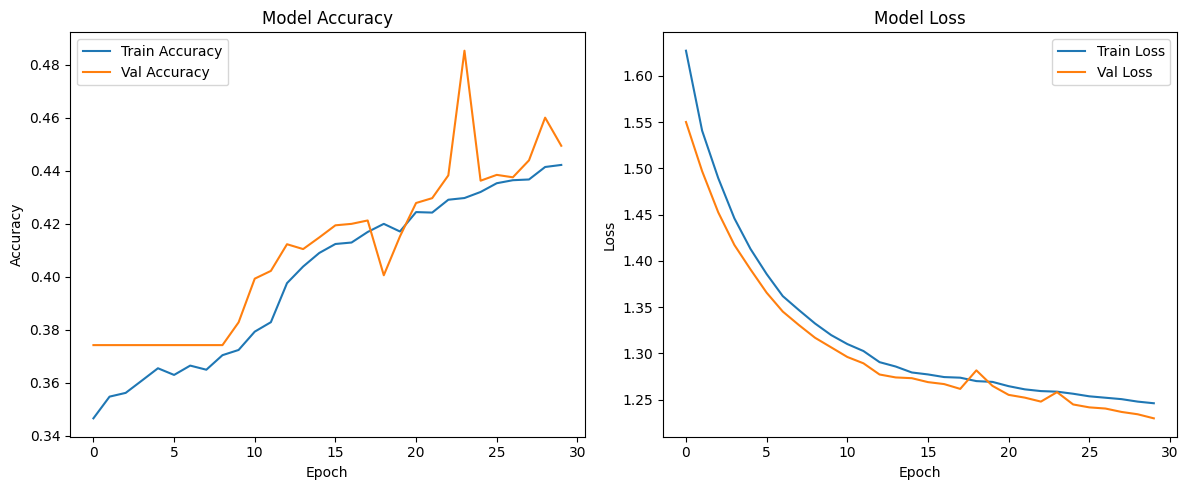

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


100/100 - 20s - 195ms/step - accuracy: 0.3986 - loss: 1.2087
Test Loss: 1.2087
Test Accuracy: 0.3986
